In [1]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

In [2]:
def f(x, y):
    return x**2 + 2* y**2 + 3
#np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [3]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

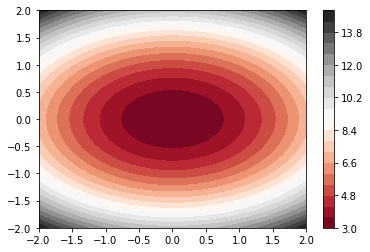

In [4]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

Text(0.5, 0.92, 'surface')

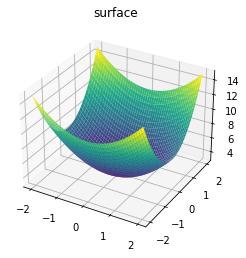

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 1, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

In [8]:
 k = 0                   # iteration number
    x_k = initial_point[0]
    y_k = initial_point[1]
    epsilon = -0.01         # stopping criterion; small negative value for minimization problems
    alpha = 0.01            # step size
    results = { 'Ks': [], 'Xs': [], 'Ys': [], 'Fs': [] }
    improvement = epsilon
    
    # repeat until convergence
    while improvement <= epsilon:
        k += 1
        # evaluate function
        f_k = func(x_k, y_k)
        if k>1:
            improvement = f_k - results['Fs'][-1]
        # store statistics
        results['Ks'].append(k)
        results['Xs'].append(x_k)
        results['Ys'].append(y_k)
        results['Fs'].append(f_k)
        if verbose:
            print('iteration k={};\t f={};\t point (x={}, y={})'.format(k,f_k,x_k,y_k))
        # follow gradient and move to next point
        x_k -= alpha * gradients[0](x_k, y_k)
        y_k -= alpha * gradients[1](x_k, y_k)
    
    # function has stopped improving
    results['optimal_solution'] = (results['Xs'][-1], results['Ys'][-1])
    results['optimal_cost'] = results['Fs'][-1]
    if verbose:
        print('gradient descent finished'
              '; result=', results['optimal_solution'],
              '; cost=', results['optimal_cost'])
    
    return results


# example
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def f(x, y):
    return x**2 + y**2 - np.log(x-2) + 10 - np.log(y-2)

def grad_x(x, y):
    return 2*x - 1/(x-2)

def grad_y(x, y):
    return 2*y - 1/(y-2)

solution = run_gradient_descent(f, (3.5, 3.5), (grad_x, grad_y), True)

# plot
x = np.arange(2.001, 4, 1/100.)
y = np.arange(2.001, 4, 1/100.)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

fig = plt.figure(figsize=(14, 5), dpi=100)
ax = fig.add_subplot(121, projection="3d")
ax.plot(solution['Xs'], solution['Ys'], [x for x in solution['Fs']], marker='o', color='#f89406', zorder=2)
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, alpha=0.5, zorder=1)
plt.title(r'$f(x,y)=x^2+y^2+10-log(x-2)-log(y-2)$')
ax = fig.add_subplot(122)
plt.title('value of f(x,y) at each iteration')
ax.scatter(solution['Ks'], solution['Fs'], color='#f89406')
ax.set_xlabel('iteration k')

plt.show()

IndentationError: unexpected indent (<ipython-input-8-5032662deab7>, line 2)